#Parcial de IA #1




##Librerias

In [ ]:
!pip uninstall -y tensorflow tf-keras
!pip install tensorflow==2.15.0

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: tf_keras 2.17.0
Uninstalling tf_keras-2.17.0:
  Successfully uninstalled tf_keras-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully u

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, callbacks
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Dense, Reshape, BatchNormalization, Dropout
from sklearn.manifold import TSNE
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
# Configuración de la semilla para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

#Base de datos

In [ ]:
# Carga de datos y preprocesamiento
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalización de los datos
X_train_full = X_train_full.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

# División del conjunto de datos en entrenamiento y validación
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Función para mostrar una imagen en escala de grises
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# Función para mostrar las reconstrucciones del modelo
def show_reconstructions(model, images=X_test, n_images=5):
    reconstructions = model.predict(images[:n_images])
    plt.figure(figsize=(n_images * 1.5, 3))

    for i in range(n_images):
        plt.subplot(2, n_images, 1 + i)
        plot_image(images[i].reshape(28, 28))  # Imagen original

        plt.subplot(2, n_images, 1 + n_images + i)
        plot_image(reconstructions[i].reshape(28, 28))  # Imagen reconstruida

# Función para calcular la precisión redondeada
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

# Función para graficar la historia del entrenamiento
def plot_history(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(6, 3))

    # Gráfico de pérdida
    plt.plot(epochs, history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(epochs, history.history['val_loss'], label='Pérdida de validación', linestyle='--')

    # Gráfico de precisión (si está disponible)
    if 'rounded_accuracy' in history.history:
        plt.plot(epochs, history.history['rounded_accuracy'], label='Precisión de entrenamiento')
    if 'val_rounded_accuracy' in history.history:
        plt.plot(epochs, history.history['val_rounded_accuracy'], label='Precisión de validación', linestyle='--')

    plt.title('Métricas de Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Métricas')
    plt.legend()
    plt.show()

##Punto 2.2

 Para los modelos estudiados en el punto 2.1, presente el entrenamiento y evaluacion de los mismos sobre la base de datos Fashion
 Mnist. Discuta los resultados obtenidos y los tips de entrenamiento utilizados en cada caso para facilitar la convergencia de cada
 uno de los metodos.

### Autoencoders regularizados

Sin tips de entrenamiento:
#### **Autoencoder Simple**

- **Estructura del Modelo**:
  - **Codificación**:
    - 64 neuronas con regularización L1 para prevenir el sobreajuste.
  - **Decodificación**:
    - Capa final con activación sigmoide para restaurar las imágenes.

- **Compilación**:
  - Optimizador Adam.
  - Pérdida de entropía cruzada binaria.

- **Entrenamiento**:
  - 20 épocas.
  - Tamaño de lote de 256.
  - Barajado de datos en cada época.
  - Evaluación con un conjunto de validación.

Epoch 1/10
215/215 [==============================] - 11s 14ms/step - loss: 0.3986 - rounded_accuracy: 0.8319 - val_loss: 0.3338 - val_rounded_accuracy: 0.8890
Epoch 2/10
215/215 [==============================] - 2s 10ms/step - loss: 0.3182 - rounded_accuracy: 0.9030 - val_loss: 0.3102 - val_rounded_accuracy: 0.9133
Epoch 3/10
215/215 [==============================] - 2s 7ms/step - loss: 0.3010 - rounded_accuracy: 0.9212 - val_loss: 0.2978 - val_rounded_accuracy: 0.9262
Epoch 4/10
215/215 [==============================] - 2s 8ms/step - loss: 0.2920 - rounded_accuracy: 0.9307 - val_loss: 0.2908 - val_rounded_accuracy: 0.9340
Epoch 5/10
215/215 [==============================] - 2s 7ms/step - loss: 0.2866 - rounded_accuracy: 0.9363 - val_loss: 0.2865 - val_rounded_accuracy: 0.9381
Epoch 6/10
215/215 [==============================] - 2s 7ms/step - loss: 0.2832 - rounded_accuracy: 0.9397 - val_loss: 0.2837 - val_rounded_accuracy: 0.9406
Epoch 7/10
215/215 [=============================

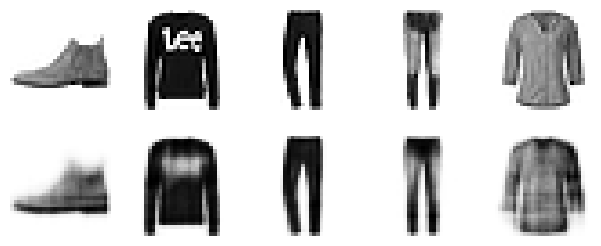

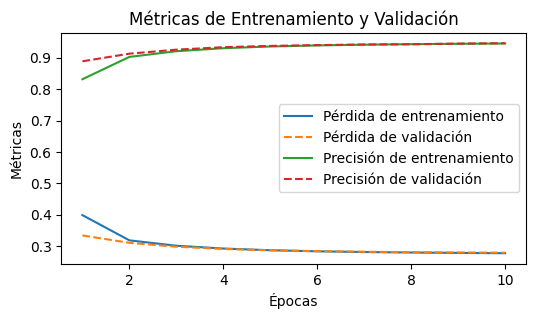

In [ ]:
# Parámetros de la red neuronal
# Dimensiones de las imágenes (28x28)
input_dim = X_train.shape[1:]
# Dimensión de la capa de codificación
encoding_dim = 64
# Factor de regularización L1
l_reg = 1e-5

# Modelo del autoencoder
input_img = layers.Input(shape=input_dim)
x = layers.Flatten()(input_img)
encoded = layers.Dense(encoding_dim,
                       activation='relu',
                       activity_regularizer=regularizers.l1(l_reg))(x)
decoded = layers.Dense(np.prod(input_dim), activation='sigmoid')(encoded)
decoded = layers.Reshape(input_dim)(decoded)

# Creación del modelo de autoencoder
autoencoder = models.Model(input_img, decoded)

# Compilación del modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=[rounded_accuracy])

# Entrenamiento del modelo
history = autoencoder.fit(X_train, X_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_valid, X_valid),
                          verbose=1)

# Mostrar las reconstrucciones
show_reconstructions(autoencoder, images=X_test)

# Graficar la historia del entrenamiento
plot_history(history)

#### **Autoencoder Mejorado**

- **Estructura del Modelo**:
  - **Codificación**:
    - 128 unidades con activación ReLU, normalización por lotes y Dropout.
    - 64 unidades con activación ReLU y regularización L2.
  - **Decodificación**:
    - 128 unidades con activación ReLU, normalización por lotes y Dropout.
    - Capa final con activación sigmoide para reconstrucción de imágenes.

- **Compilación**:
  - Optimizador Adam.
  - Pérdida de error cuadrático medio (MSE).

- **Entrenamiento**:
  - 100 épocas.
  - Tamaño de lote de 256.
  - Barajado de datos en cada época.
  - Evaluación con un conjunto de validación.

- **Beneficios**:
  - Capas adicionales mejoran la generalización y estabilidad.
  - Regularización L2 reduce el sobreajuste.
  - Mayor número de épocas permite una mejor convergencia del modelo.

Epoch 1/100
215/215 [==============================] - 4s 7ms/step - loss: 0.0696 - rounded_accuracy: 0.8436 - val_loss: 0.0261 - val_rounded_accuracy: 0.9098
Epoch 2/100
215/215 [==============================] - 2s 7ms/step - loss: 0.0252 - rounded_accuracy: 0.9098 - val_loss: 0.0202 - val_rounded_accuracy: 0.9184
Epoch 3/100
215/215 [==============================] - 2s 9ms/step - loss: 0.0220 - rounded_accuracy: 0.9162 - val_loss: 0.0174 - val_rounded_accuracy: 0.9284
Epoch 4/100
215/215 [==============================] - 1s 6ms/step - loss: 0.0205 - rounded_accuracy: 0.9198 - val_loss: 0.0160 - val_rounded_accuracy: 0.9323
Epoch 5/100
215/215 [==============================] - 1s 6ms/step - loss: 0.0194 - rounded_accuracy: 0.9222 - val_loss: 0.0156 - val_rounded_accuracy: 0.9342
Epoch 6/100
215/215 [==============================] - 1s 6ms/step - loss: 0.0187 - rounded_accuracy: 0.9238 - val_loss: 0.0146 - val_rounded_accuracy: 0.9364
Epoch 7/100
215/215 [=========================

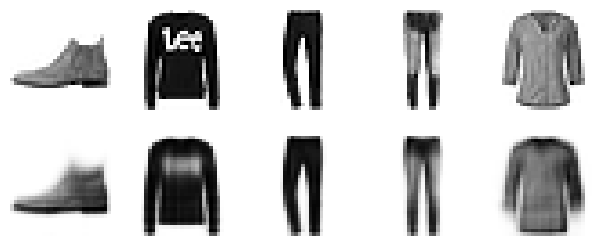

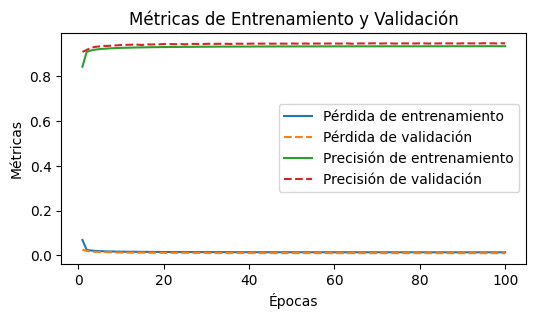

In [ ]:
input_dim = X_train.shape[1:]
first_enc_dim = 128
second_enc_dim = 64
l_reg = 1e-5

# Modelo del autoencoder
input_img = layers.Input(shape=input_dim)
x = layers.Flatten()(input_img)
encoded = layers.Dense(first_enc_dim, activation='relu')(x)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Dropout(0.2)(encoded)
encoded = layers.Dense(second_enc_dim,
                       activation='relu',
                       activity_regularizer=regularizers.l2(l_reg),
                       name='encoder')(encoded)

decoded = layers.Dense(first_enc_dim, activation='relu')(encoded)
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Dropout(0.2)(decoded)
decoded = layers.Dense(np.prod(input_dim), activation='sigmoid')(decoded)
decoded = layers.Reshape(input_dim)(decoded)

# Creación del modelo de autoencoder
autoencoder_tips = models.Model(input_img, decoded)

# Compilación del modelo
autoencoder_tips.compile(optimizer='adam', loss='mse', metrics=[rounded_accuracy])

# Entrenamiento del modelo
history_tips = autoencoder_tips.fit(X_train, X_train,
                                    epochs=100,
                                    batch_size=256,
                                    shuffle=True,
                                    validation_data=(X_valid, X_valid),
                                    verbose=1)

# Mostrar las reconstrucciones
show_reconstructions(autoencoder_tips, images=X_test)

# Graficar la historia del entrenamiento
plot_history(history_tips)


### Autoencoders Variacionales

#### Autoencoder Variacional Simple:
- **Estructura del Modelo**:
  - **Encoder**:
    - Capas Conv2D para extracción de características.
    - Capas densas para generar la media (`latent_z_mean`) y la varianza logarítmica (`latent_z_log_var`) de la distribución latente.
  - **Decoder**:
    - Capas densas y Conv2DTranspose para reconstruir imágenes desde la representación latente.

- **Reparametrización**:
  - Generación de muestras del espacio latente usando `latent_z_mean` y `latent_z_log_var`.
  - Aplicación de perturbación aleatoria para la reparametrización.

- **Pérdida**:
  - **Pérdida de Reconstrucción**: Basada en entropía cruzada binaria.
  - **Pérdida KL**: Regulariza el modelo penalizando desviaciones de la distribución latente de la normal estándar.
  - **Pérdida Total**: Combinación ponderada de la pérdida de reconstrucción y la pérdida KL.

- **Compilación**:
  - Optimizador SGD con tasa de aprendizaje de 0.3.
  - Pérdida de entropía cruzada binaria y métrica de precisión redondeada.

- **Entrenamiento**:
  - 50 épocas.
  - Tamaño de lote de 128.
  - Evaluación con un conjunto de validación.

Epoch 1/50
430/430 [==============================] - 9s 11ms/step - loss: 0.9504 - rounded_accuracy: 0.7106 - val_loss: 0.7965 - val_rounded_accuracy: 0.7740
Epoch 2/50
430/430 [==============================] - 4s 9ms/step - loss: 0.7376 - rounded_accuracy: 0.8245 - val_loss: 0.6812 - val_rounded_accuracy: 0.8620
Epoch 3/50
430/430 [==============================] - 4s 10ms/step - loss: 0.6704 - rounded_accuracy: 0.8612 - val_loss: 0.6854 - val_rounded_accuracy: 0.8421
Epoch 4/50
430/430 [==============================] - 4s 8ms/step - loss: 0.6491 - rounded_accuracy: 0.8717 - val_loss: 0.6400 - val_rounded_accuracy: 0.8794
Epoch 5/50
430/430 [==============================] - 4s 9ms/step - loss: 0.6353 - rounded_accuracy: 0.8782 - val_loss: 0.6368 - val_rounded_accuracy: 0.8811
Epoch 6/50
430/430 [==============================] - 4s 10ms/step - loss: 0.6237 - rounded_accuracy: 0.8830 - val_loss: 0.6174 - val_rounded_accuracy: 0.8894
Epoch 7/50
430/430 [=============================

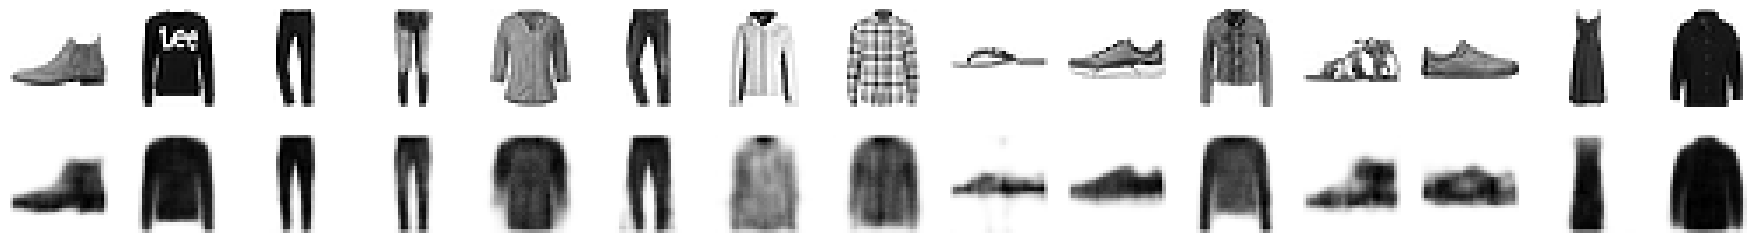

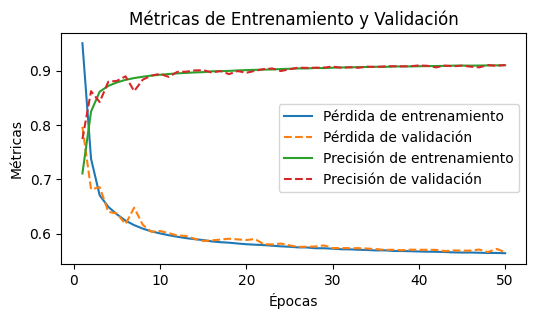

In [ ]:
# Construcción del encoder
def build_encoder(latent_dim):
    encoder_inputs = Input(shape=(28, 28, 1))
    x = Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
    x = Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
    x = Flatten()(x)
    x = Dense(latent_dim, activation='relu')(x)
    latent_z_mean = Dense(latent_dim)(x)
    latent_z_log_var = Dense(latent_dim)(x)
    encoder = Model(encoder_inputs, [latent_z_mean, latent_z_log_var], name='encoder')
    return encoder

# Construcción del decoder
def build_decoder(latent_dim):
    decoder_inputs = Input(shape=(latent_dim,))
    x = Dense(7*7*64, activation='relu')(decoder_inputs)
    x = Reshape((7, 7, 64))(x)
    x = Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    decoder_outputs = Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)
    decoder = Model(decoder_inputs, decoder_outputs, name='decoder')
    return decoder

# Definición de la clase VAE
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        latent_z_mean, latent_z_log_var = self.encoder(inputs)
        z = self.reparameterize(latent_z_mean, latent_z_log_var)
        reconstructed = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(inputs, tf.squeeze(reconstructed, axis=-1)))
        kl_loss = -0.5 * tf.reduce_mean(1 + latent_z_log_var - tf.square(latent_z_mean) - tf.exp(latent_z_log_var))
        total_loss = 0.7 * reconstruction_loss + 0.3 * kl_loss
        self.add_loss(total_loss)
        return reconstructed

    def reparameterize(self, latent_z_mean, latent_z_log_var):
        eps = tf.random.normal(shape=tf.shape(latent_z_mean))
        return eps * tf.exp(latent_z_log_var * .5) + latent_z_mean

# Parámetros del modelo
latent_dim = 64
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)
vae = VAE(encoder, decoder)

# Compilación del modelo
vae.compile(optimizer=keras.optimizers.SGD(learning_rate=3e-1), loss="binary_crossentropy", metrics=[rounded_accuracy])

# Entrenamiento del modelo
history_vae = vae.fit(X_train, X_train,
                      epochs=50,
                      batch_size=128,
                      validation_data=(X_valid, X_valid),
                      verbose=1)

show_reconstructions(vae, images = X_test, n_images=15)
plot_history(history_vae)

#### Autoencoder Variacional Mejorado:

- **Construcción del Encoder**:
  - Se utiliza la función `build_encoder_vae` para crear el encoder.
  - **Capas utilizadas**:
    - Capas Conv2D que aplican filtros, seguidas de Batch Normalization y activación LeakyReLU.
    - Aplanamiento de la salida, seguido de una capa densa y una capa de Dropout para obtener la representación latente.
    - Se generan la media (`latent_z_mean varianza logarítmica (`latent_z_log_var`).

- **Construcción del Decoder**:
  - Se utiliza la función `build_decoder_vae` para crear el decoder.
  - **Capas utilizadas**:
    - Capas densas y Conv2DTranspose con Batch Normalization y activación ReLU para reconstruir la imagen desde la representación latente.

- **Implementación del Modelo VAE**:
  - La clase `CustomVAE` integra el encoder y el decoder.
  - **Funciones del Modelo**:
    - Maneja la reparametrización para generar muestras del espacio latente.
    - Calcula la pérdida de reconstrucción y la pérdida de divergencia KL.
    - Suma ambas pérdidas para obtener la pérdida total.

- **Compilación y Entrenamiento**:
  - El modelo VAE se compila con el optimizador Adam y la función de pérdida de entropía cruzada binaria.
  - Entrenamiento durante 50 épocas con un tamaño de lote de 256, utilizando un conjunto de validación para evaluar el rendimiento.

**Diferencias y Tips de Entrenamiento**:
1. **Batch Normalization**: Mejora la estabilidad y velocidad del entrenamiento al normalizar las salidas de las capas convolucionales.
2. **Activación LeakyReLU**: Evita el problema de unidades muertas que puede ocurrir con ReLU, permitiendo un pequeño gradiente incluso cuando las unidades no están activas.
3. **Regularización con Dropout**: Ayuda a prevenir el sobreajuste al desactivar aleatoriamente neuronas durante el entrenamiento, mejorando la generalización del modelo.
4. **Cálculo Completo de la Pérdida**: Considera tanto la pérdida de reconstrucción como la pérdida de divergencia KL, resultando en un entrenamiento más equilibrado y efectivo.
5. **Inicialización de Pesos He Normal**: Mantiene la varianza de los gradientes a través de las capas, promoviendo una convergencia más rápida y estable del modelo.
6. **Arquitectura Mejorada del Decodificador**: Usa capas de deconvolución con Batch Normalization, generando imágenes más nítidas y de mejor calidad en la fase de decodificación.
7. **Early Stopping**: Permite detener el entrenamiento cuando la pérdida de validación no mejora, evitando el sobreajuste y reduciendo el tiempo de entrenamiento.

Epoch 1/80
215/215 [==============================] - 21s 67ms/step - reconstruction_loss: 0.4676 - kl_loss: 0.0655 - total_loss: 0.3470 - rounded_accuracy: 0.7872 - val_reconstruction_loss: 0.3723 - val_kl_loss: 0.1004 - val_total_loss: 0.3179 - val_rounded_accuracy: 0.8599
Epoch 2/80
215/215 [==============================] - 13s 59ms/step - reconstruction_loss: 0.3644 - kl_loss: 0.0901 - total_loss: 0.2821 - rounded_accuracy: 0.8613 - val_reconstruction_loss: 0.3605 - val_kl_loss: 0.0839 - val_total_loss: 0.3052 - val_rounded_accuracy: 0.8679
Epoch 3/80
215/215 [==============================] - 13s 59ms/step - reconstruction_loss: 0.3490 - kl_loss: 0.0853 - total_loss: 0.2699 - rounded_accuracy: 0.8743 - val_reconstruction_loss: 0.3451 - val_kl_loss: 0.0874 - val_total_loss: 0.2936 - val_rounded_accuracy: 0.8793
Epoch 4/80
215/215 [==============================] - 12s 57ms/step - reconstruction_loss: 0.3421 - kl_loss: 0.0826 - total_loss: 0.2643 - rounded_accuracy: 0.8800 - val_re

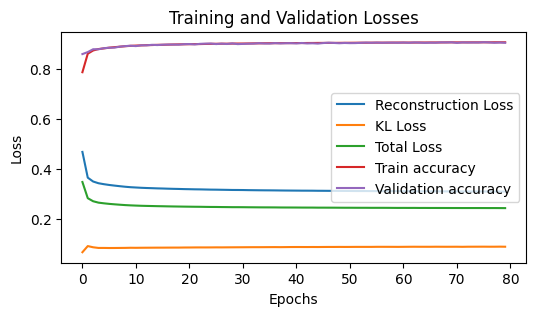

1/1 [==============================] - 1s 564ms/step


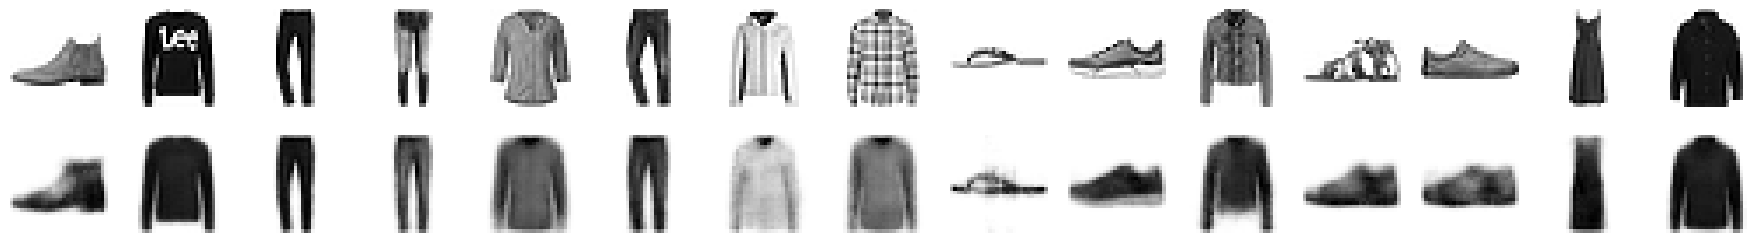

In [ ]:
# Función para construir el encoder del VAE
def create_encoder(latent_dim):
    inputs = Input(shape=(28, 28, 1))
    conv1 = Conv2D(256, kernel_size=3, strides=2, padding='same')(inputs)
    norm1 = BatchNormalization()(conv1)
    act1 = LeakyReLU()(norm1)
    conv2 = Conv2D(200, kernel_size=3, strides=2, padding='same')(act1)
    norm2 = BatchNormalization()(conv2)
    act2 = LeakyReLU()(norm2)
    conv3 = Conv2D(128, kernel_size=3, strides=2, padding='same')(act2)
    norm3 = BatchNormalization()(conv3)
    act3 = LeakyReLU()(norm3)
    flat = Flatten()(act3)
    dense = Dense(latent_dim, activation='relu', kernel_initializer="he_normal")(flat)
    drop = Dropout(0.2)(dense)
    latent_z_mean = Dense(latent_dim)(drop)  # Capa para la media latente
    latent_z_log_var = Dense(latent_dim)(drop)  # Capa para la varianza logarítmica latente
    encoder = Model(inputs, [latent_z_mean, latent_z_log_var], name='encoder')  # Creación del modelo encoder
    return encoder

# Función para construir el decoder del VAE
def create_decoder(latent_dim):
    inputs = Input(shape=(latent_dim,))  # Entrada con la dimensión latente
    dense = Dense(7*7*128, activation='relu', kernel_initializer="he_normal")(inputs)  # Capa densa inicial
    reshaped = Reshape((7, 7, 128))(dense)  # Reformado para la entrada de Conv2DTranspose
    deconv1 = Conv2DTranspose(128, kernel_size=3, strides=2, padding='same', activation='relu', kernel_initializer="he_normal")(reshaped)  # Primera capa Conv2DTranspose
    norm1 = BatchNormalization()(deconv1)  # Normalización por lotes
    deconv2 = Conv2DTranspose(64, kernel_size=3, strides=2, padding='same', activation='relu', kernel_initializer="he_normal")(norm1)  # Segunda capa Conv2DTranspose
    norm2 = BatchNormalization()(deconv2)  # Normalización por lotes
    deconv3 = Conv2DTranspose(1, kernel_size=3, padding='same', activation='sigmoid', kernel_initializer="he_normal")(norm2)  # Capa final de Conv2DTranspose
    outputs = Reshape((28, 28, 1))(deconv3)  # Reformado final a la forma de la imagen
    decoder = Model(inputs, outputs, name='decoder')  # Creación del modelo decoder
    return decoder

# Definición de la clase VAE personalizada
class CustomVAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(CustomVAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.accuracy_tracker = tf.keras.metrics.Mean(name="rounded_accuracy")

    def call(self, inputs):
        latent_z_mean, latent_z_log_var = self.encoder(inputs)
        z = self.sample_latent_space(latent_z_mean, latent_z_log_var)
        reconstructed = self.decoder(z)
        return reconstructed

    @property
    def metrics(self):
        return [self.reconstruction_loss_tracker, self.kl_loss_tracker, self.total_loss_tracker, self.accuracy_tracker]

    def train_step(self, data):
        inputs, _ = data
        with tf.GradientTape() as tape:
            latent_z_mean, latent_z_log_var = self.encoder(inputs)
            z = self.sample_latent_space(latent_z_mean, latent_z_log_var)
            reconstructed = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(inputs, reconstructed))
            kl_loss = -0.5 * tf.reduce_mean(1 + latent_z_log_var - tf.square(latent_z_mean) - tf.exp(latent_z_log_var))
            total_loss = 0.7 * reconstruction_loss + 0.3 * kl_loss
            accuracy = rounded_accuracy(inputs, reconstructed)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        self.total_loss_tracker.update_state(total_loss)
        self.accuracy_tracker.update_state(accuracy)
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        inputs, _ = data
        latent_z_mean, latent_z_log_var = self.encoder(inputs)
        z = self.sample_latent_space(latent_z_mean, latent_z_log_var)
        reconstructed = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(inputs, reconstructed))
        kl_loss = -0.5 * tf.reduce_mean(1 + latent_z_log_var - tf.square(latent_z_mean) - tf.exp(latent_z_log_var))
        total_loss = 0.8 * reconstruction_loss + 0.2 * kl_loss
        accuracy = rounded_accuracy(inputs, reconstructed)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        self.total_loss_tracker.update_state(total_loss)
        self.accuracy_tracker.update_state(accuracy)
        return {m.name: m.result() for m in self.metrics}

    def sample_latent_space(self, latent_z_mean, latent_z_log_var):
        epsilon = tf.random.normal(shape=tf.shape(latent_z_mean))
        return epsilon * tf.exp(latent_z_log_var * 0.5) + latent_z_mean

# Construcción del modelo VAE con las funciones anteriores
latent_dim = 70
encoder_vae = create_encoder(latent_dim)
decoder_vae = create_decoder(latent_dim)

vae2 = CustomVAE(encoder_vae, decoder_vae)
vae2.compile(optimizer='Adam')

# Entrenamiento del VAE
history_vae2 = vae2.fit(X_train.reshape(-1, 28, 28, 1), X_train.reshape(-1, 28, 28, 1),
                        epochs=80,
                        batch_size=256,
                        validation_data=(X_valid.reshape(-1, 28, 28, 1), X_valid.reshape(-1, 28, 28, 1)),
                        verbose=1)

# Gráfico de las pérdidas
plt.figure(figsize=(6, 3))
plt.plot(history_vae2.history['reconstruction_loss'], label='Reconstruction Loss')
plt.plot(history_vae2.history['kl_loss'], label='KL Loss')
plt.plot(history_vae2.history['total_loss'], label='Total Loss')
plt.plot(history_vae2.history['rounded_accuracy'], label='Train accuracy')
plt.plot(history_vae2.history['val_rounded_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Mostrar las reconstrucciones del VAE
show_reconstructions(vae2, images=X_test.reshape(-1, 28, 28, 1), n_images=15)

### Red generativa adversativa

#### **GAN - simple**

- **Estructura del Modelo**:
  - **Generador**:
    - Capas densas con activación SELU.
    - Genera imágenes de 28x28 a partir de un vector de codificación de tamaño 30.
  - **Discriminador**:
    - Capas densas con activación SELU.
    - Produce una probabilidad indicando si una imagen es real o generada.

- **Compilación del Discriminador**:
  - Pérdida de entropía cruzada binaria.
  - Optimizador RMSprop.

- **Construcción de la GAN**:
  - Combinación del generador y el discriminador.
  - El generador busca producir imágenes que el discriminador clasifique como reales.

- **Entrenamiento**:
  - **Fase 1: Entrenamiento del Discriminador**:
    - Se entrena para distinguir entre imágenes reales y generadas.
  - **Fase 2: Entrenamiento del Generador**:
    - Se entrena para engañar al discriminador, generando imágenes que parezcan reales.
  - Durante cada época:
    - Se generan imágenes a partir de ruido aleatorio.
    - Se muestran las primeras 20 imágenes generadas.

In [ ]:
# Función para mostrar múltiples imágenes
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1

    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))

    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

    plt.show()

In [ ]:
# Definición del tamaño del vector de entrada para el generador
coding_dim = 30

# Construcción del generador
gen_model = keras.models.Sequential([
    Input(shape=[coding_dim]),
    Dense(100, activation="selu"),
    Dense(150, activation="selu"),
    Dense(28 * 28, activation="sigmoid"),
    Reshape([28, 28])
])

# Construcción del discriminador
disc_model = keras.models.Sequential([
    Input(shape=[28, 28]),
    Flatten(),
    Dense(150, activation="selu"),
    Dense(100, activation="selu"),
    Dense(1, activation="sigmoid")
])

# Combinación del generador y el discriminador para formar la GAN
gan_model = keras.models.Sequential([gen_model, disc_model])

# Compilación del discriminador con la función de pérdida de entropía cruzada binaria y el optimizador RMSprop
disc_model.compile(loss="binary_crossentropy", optimizer="rmsprop")
disc_model.trainable = False  # Se congela el discriminador durante el entrenamiento de la GAN

# Compilación de la GAN completa con la misma función de pérdida y optimizador
gan_model.compile(loss="binary_crossentropy", optimizer="rmsprop")


In [ ]:
# Función para entrenar la GAN
def train_gan(gan_model, dataset, batch_size, coding_dim, n_epochs=5):
    gen_model, disc_model = gan_model.layers
    for epoch in range(n_epochs):
        print(f"Epoch {epoch + 1}/{n_epochs}")

        for batch_idx, real_images in enumerate(dataset):
            print(f'\r{batch_idx + 1}/{round(X_train.shape[0] / batch_size)}', end='')

            # Fase 1 - Entrenamiento del discriminador
            noise = tf.random.normal(shape=[batch_size, coding_dim])
            fake_images = gen_model(noise)
            combined_images = tf.concat([fake_images, real_images], axis=0)
            labels = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            disc_model.trainable = True
            disc_model.train_on_batch(combined_images, labels)

            # Fase 2 - Entrenamiento del generador
            noise = tf.random.normal(shape=[batch_size, coding_dim])
            misleading_targets = tf.constant([[1.]] * batch_size)
            disc_model.trainable = False
            gan_model.train_on_batch(noise, misleading_targets)

        # Muestra de las primeras 20 imágenes generadas después de cada época
        plot_multiple_images(fake_images[:20], 10)
        plt.show()

Epoch 1/1
214/215

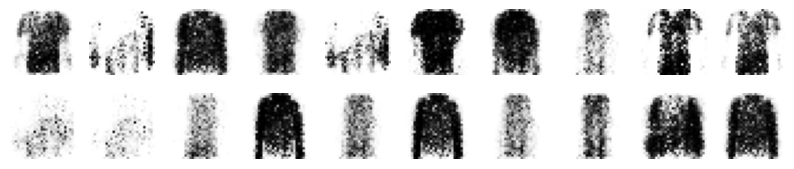

In [ ]:
batch_size = 256

# Preparo el dataset utilizando X_train, ajustando las imágenes a tamaño (28, 28)
dataset = tf.data.Dataset.from_tensor_slices(np.reshape(X_train, (X_train.shape[0], 28, 28)))
dataset = dataset.shuffle(buffer_size=1000)  # Mezclo el dataset con un buffer de 1000 elementos

# Divido el dataset en lotes y optimizo la carga con prefetching
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

# Inicio el entrenamiento de la GAN utilizando el dataset preparado, especificando el tamaño de lote, la dimensión del vector de codificación y el número de épocas
train_gan(gan_model, dataset, batch_size, coding_dim, n_epochs=1)

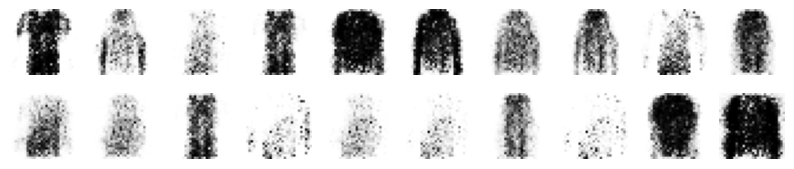

In [ ]:
# Generación de un lote de ruido aleatorio con el tamaño especificado
random_noise = tf.random.normal(shape=[batch_size, coding_dim])
# Creación de imágenes utilizando el generador a partir del ruido aleatorio
fake_images = gen_model(random_noise)

# Visualización de las primeras 20 imágenes generadas en una cuadrícula de 10 columnas
plot_multiple_images(fake_images[:20], n_cols=10)

#### **GAN - Mejorada**

- **Estructura del Modelo**:
  - **Generador**:
    - Utiliza capas Conv2DTranspose para generar imágenes de 28x28 a partir de un vector de codificación de tamaño 30.
    - La última capa del generador usa la activación 'sigmoid' para asegurar que las imágenes generadas estén en el rango [0, 1].
  - **Discriminador**:
    - Utiliza capas Conv2D para clasificar las imágenes como reales o falsas.
    - Se ha añadido Dropout después de las capas convolucionales para prevenir el sobreajuste.

- **Capas Convolucionales y Transpuestas**:
  - **Generador**:
    - Las capas Conv2DTranspose permiten la generación de imágenes de mayor calidad al aprender características espaciales.
  - **Discriminador**:
    - Las capas Conv2D mejoran la capacidad del discriminador para detectar características en las imágenes.

- **Batch Normalization**:
  - Se aplica después de cada capa convolucional en ambas redes (generador y discriminador).
  - Estabiliza y acelera el entrenamiento al mantener una distribución estable de activaciones.

- **Dropout en el Discriminador**:
  - Ayuda a prevenir el sobreajuste al desactivar aleatoriamente algunas neuronas durante el entrenamiento.
  - Mejora la generalización del discriminador al manejar datos nuevos de manera más efectiva.

- **Optimización**:
  - El discriminador se compila con la pérdida de entropía cruzada binaria y el optimizador Adam.
  - Se utiliza una tasa de aprendizaje baja (0.0002) y un valor de beta1 de 0.5, configuración comúnmente efectiva para entrenar GANs.

- **Entrenamiento**:
  - **Fase 1: Entrenamiento del Discriminador**:
    - Se entrena para distinguir entre imágenes reales y generadas.
  - **Fase 2: Entrenamiento del Generador**:
    - Se entrena para engañar al discriminador, generando imágenes que parezcan reales.
  - Durante cada época:
    - Se muestran las primeras 30 imágenes generadas para evaluar el progreso.

In [ ]:
# Definición del tamaño del vector de codificación para el ruido
coding_dim = 30

# Construcción del generador con capas mejoradas
gen_model = keras.models.Sequential([
    Input(shape=[coding_dim]),
    Dense(7 * 7 * 128, activation="selu"),
    Reshape([7, 7, 128]),
    BatchNormalization(),
    Conv2DTranspose(256, kernel_size=5, strides=2, padding='same', activation='selu'),
    BatchNormalization(),
    Conv2DTranspose(32, kernel_size=5, strides=2, padding='same', activation='selu'),
    BatchNormalization(),
    Conv2DTranspose(1, kernel_size=5, strides=1, padding='same', activation='sigmoid')
])

# Construcción del discriminador con capas mejoradas
disc_model = keras.models.Sequential([
    Input(shape=[28, 28, 1]),
    Conv2D(32, kernel_size=5, strides=2, padding='same', activation='selu'),
    BatchNormalization(),
    Conv2D(64, kernel_size=5, strides=2, padding='same', activation='selu'),
    BatchNormalization(),
    Conv2D(256, kernel_size=5, strides=2, padding='same', activation='selu'),  # Capa convolucional final
    BatchNormalization(),
    Dropout(0.2),
    Flatten(),
    Dense(1, activation='sigmoid')
])


# Creación del modelo GAN combinando generador y discriminador
gan_model = keras.models.Sequential([gen_model, disc_model])

# Compilación del discriminador con Adam y configuración de entrenamiento
disc_model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
disc_model.trainable = False

# Compilación del modelo GAN completo
gan_model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))

In [ ]:
# Función para entrenar la GAN
def train_gan(gan_model, dataset, batch_size, coding_dim, n_epochs=5):
    gen_model, disc_model = gan_model.layers
    for epoch in range(n_epochs):
        print(f"Epoch {epoch + 1}/{n_epochs}")
        for batch_idx, real_images in enumerate(dataset):
            print(f'\r{batch_idx + 1}/{round(X_train.shape[0] / batch_size)}', end='')

            # Fase 1 - Entrenamiento del discriminador
            random_noise = tf.random.normal(shape=[batch_size, coding_dim])
            fake_images = gen_model(random_noise)  # No need to squeeze here
            combined_images = tf.concat([fake_images, real_images], axis=0)
            labels = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            disc_model.trainable = True
            disc_model.train_on_batch(combined_images, labels)

            # Fase 2 - Entrenamiento del generador
            noise = tf.random.normal(shape=[batch_size, coding_dim])
            misleading_labels = tf.constant([[1.]] * batch_size)
            disc_model.trainable = False
            gan_model.train_on_batch(noise, misleading_labels)

        # Removed the extra dimension selection as fake_images is likely already in the format (batch_size, height, width)
        plot_multiple_images(fake_images[:30, :, :], n_cols=10)
        plt.show()  # Muestra las imágenes generadas

In [ ]:
# Configuración del tamaño de lote y preparación del dataset
batch_size = 64
dataset = tf.data.Dataset.from_tensor_slices(np.reshape(X_train, (X_train.shape[0], 28, 28))).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
train_gan(gan_model, dataset, batch_size, coding_dim, n_epochs=10)

Epoch 1/10
1/859

InvalidArgumentError: {{function_node __wrapped__ConcatV2_N_2_device_/job:localhost/replica:0/task:0/device:GPU:0}} ConcatOp : Ranks of all input tensors should match: shape[0] = [64,28,28,1] vs. shape[1] = [64,28,28] [Op:ConcatV2] name: concat

##Punto 2.3
Consulte en que consisten los class activation maps (CAM) y su aplicabildad para interpretar los resultados de clasificacion de
 imagenes con redes neuronales. Proponga un modelo de clasificacion de la base de datos Fashion Mnist con regularizacion por
 autoencoders. Presente una simulacion para el metodo GradCam++ en al menos tres capas de la red propuesta para dos clases de
 prueba. Nota: se sugiere utilizar el paquete keras-vis: https://raghakot.github.io/keras-vis/.

###Qué son los Class Activation Maps?

Un Class Activation Map (CAM) es una visualización que muestra las regiones de la imagen que fueron relevantes para que la red identifique su decisión de clasificación. Se generan al final de las redes de convolución, justo antes de las capas de clasificación. Para hacerlo, se ponderan los mapas de características de la última capa convolucional por los pesos de la capa densa que sigue, reflejando la importancia de cada ubicación en la imagen para la clase predicha.

##Aplicabilidad de CAM
La principal aplicabilidad de los CAM es la interpretación de las decisiones de clasificación de las redes neuronales en tareas de visión por computadora. Ayudan a:

* Entender la decisión de la red: Verificar si la red está prestando atención a las regiones correctas de la imagen para su decisión.
* Diagnóstico y Mejora de Modelos: Identificar casos donde el modelo está clasificando incorrectamente debido a que se enfoca en partes irrelevantes de la imagen.
* Aumento de Datos: Identificar regiones de interés para técnicas de aumento de datos más específicas.

In [ ]:
!pip uninstall -y tensorflow tf-keras
!pip install tensorflow==2.15.0
!pip install tf-keras-vis

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             fbeta_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, roc_curve, auc)
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [ ]:

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
# Cargar los datos
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalizar los datos
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

# Dividir los datos en entrenamiento y validación
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# Agregar la dimensión del canal
X_train = np.expand_dims(X_train, axis=-1)  # Agrega la dimensión de canal
X_valid = np.expand_dims(X_valid, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
# Configuración para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

# Configuración para gráficos
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Configuración para guardar figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


In [ ]:
class ScaledBinaryCrossentropy(keras.losses.Loss):
    def __init__(self, scale):
        super(ScaledBinaryCrossentropy, self).__init__()
        self.scale = scale

    def call(self, y_true, y_pred):
        return self.scale * tf.keras.losses.mae(y_true, y_pred)

class Sampling(keras.layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
# Configuración para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

# Configuración para gráficos
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Configuración para guardar figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

# Definición de la función show_reconstructions
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

def evaluar_midl(history, modelo, X_test):
    # Evaluar el modelo en los datos de prueba
    resultado = modelo.evaluate(X_test, {"reconstruction": X_test, "dkl_loss": np.zeros((X_test.shape[0],)), "classifier": y_test}, verbose=0)
    print(f'Evaluación con test: Reconstruction Loss = {resultado[1]}, DKL Loss = {resultado[2]}, Classification Accuracy = {resultado[3]:.4f}')

    # Crear una figura con dos subplots para mostrar la pérdida y precisión
    plt.figure(figsize=(18, 5))

    # Subplot 1: Pérdida (Loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['modelo_reconstructor_loss'], label='Reconstruction Loss')
    plt.plot(history.history['val_modelo_reconstructor_loss'], label='Val Reconstruction Loss')
    plt.plot(history.history['dkl_perdida_loss'], label='DKL Loss')
    plt.plot(history.history['val_dkl_perdida_loss'], label='Val DKL Loss')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Error')
    plt.legend()

    # Subplot 2: Precisión (Accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['modelo_encoder_accuracy'], label='Training Classification Accuracy')
    plt.plot(history.history['val_modelo_encoder_accuracy'], label='Validation Classification Accuracy')
    plt.title('Precisión durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()

    # Mostrar las gráficas
    plt.show()




def plot_activation_map(nombre_capa, imagen, clase_objetivo, eje, valor_maximo, valor_minimo, modelo_gradcam, gradcam):
    # Ajuste de la imagen a la forma correcta
    imagen = imagen.reshape(1, 28, 28, 1)

    # Generación del mapa de activación utilizando GradCAM++
    mapa_activacion = gradcam(CategoricalScore(clase_objetivo), imagen, penultimate_layer=nombre_capa, normalize_cam=False)
    intensidad_promedio = np.mean(mapa_activacion[0])

    # Ploteo de la imagen original
    eje.imshow(imagen.squeeze(), cmap='binary')

    # Superposición del mapa de activación como mapa de calor
    heatmap = eje.imshow(mapa_activacion[0], cmap='jet', alpha=0.5, vmin=valor_minimo, vmax=valor_maximo)

    # Configuración del gráfico
    eje.set_title(f'Intensidad: {round(intensidad_promedio, 2)}')
    eje.axis('off')
    return heatmap



def generate_and_visualize_cam(modelo, X_test, y_test, capas, salida_objetivo, modo_clasificacion=True):
    # Configuración del modelo para GradCAM++
    modelo_para_gradcam = Model(inputs=modelo.input, outputs=modelo.get_layer(salida_objetivo).output)
    gradcam = GradcamPlusPlus(modelo_para_gradcam, model_modifier=ReplaceToLinear(), clone=True)

    # Iterar sobre cada capa especificada
    for capa in capas:
        print(f'Procesando capa: {capa}')
        for etiqueta_clase in range(10):
            indice_imagen = np.where(y_test == etiqueta_clase)[0][0]

            # Modo de visualización por clases
            if modo_clasificacion and salida_objetivo == 'classifier':
                fig, axes = plt.subplots(1, 10, figsize=(20, 2))
                cams = [gradcam(CategoricalScore(clase), X_test[indice_imagen].reshape(1, 28, 28, 1), penultimate_layer=capa, normalize_cam=False)[0] for clase in range(10)]
                valor_maximo = np.max(cams)
                valor_minimo = np.min(cams)

                # Generación y visualización de CAMs por clase
                heatmaps = []
                for clase in range(10):
                    ax = axes[clase]
                    heatmap = plot_activation_map(capa, X_test[indice_imagen], clase, ax, valor_maximo, valor_minimo, modelo_para_gradcam, gradcam)
                    heatmaps.append(heatmap)

                # Añadir una barra de colores común
                fig.colorbar(heatmaps[0], ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
                plt.show()
            else:
                # Modo para otras salidas
                fig, ax = plt.subplots(1, 1, figsize=(5, 5))
                cam = gradcam(CategoricalScore(0), X_test[indice_imagen].reshape(1, 28, 28, 1), penultimate_layer=capa, normalize_cam=False)
                ax.imshow(X_test[indice_imagen].squeeze(), cmap='binary')
                ax.imshow(cam[0], cmap='jet', alpha=0.5)
                ax.set_title(f'{salida_objetivo}, Intensidad Promedio: {np.mean(cam[0]):.2f}')
                ax.axis('off')
                plt.show()

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

def show_reconstructions(model, images=X_valid, n_images=5):

    # Obtener las reconstrucciones del modelo
    reconstructions = model.predict(images[:n_images])['reconstruction']

    # Crear una figura con subplots para mostrar las imágenes
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        # Mostrar imagen original
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        # Mostrar imagen reconstruida
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

def plot_multiple_images(images, n_cols=None):

    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1

    # Eliminar el canal si es unidimensional
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)

    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")




def evaluate_classifier_performance(imagenes_prueba, etiquetas_prueba, modelo, num_clases=10):
    # Predicción de etiquetas usando el modelo
    probabilidades_predichas = modelo.predict(imagenes_prueba)
    etiquetas_predichas = np.argmax(probabilidades_predichas['classifier'], axis=1)

    # Calcular curvas ROC y AUC para cada clase
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_clases):
        fpr[i], tpr[i], _ = roc_curve(etiquetas_prueba == i, probabilidades_predichas['classifier'][:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Matriz de confusión normalizada
    matriz_confusion = confusion_matrix(etiquetas_prueba, etiquetas_predichas, normalize='true')

    # Visualización de ROC y matriz de confusión
    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 8))
    for i in range(num_clases):
        ax1.plot(fpr[i], tpr[i], lw=2, label=f'Clase {i}')
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('Tasa de Falsos Positivos')
    ax1.set_ylabel('Tasa de Verdaderos Positivos')
    ax1.set_title('Curva ROC por Clase')
    ax1.legend(loc="lower right")

    disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=[f'Clase {i}' for i in range(num_clases)])
    disp.plot(cmap=plt.cm.Blues, ax=ax2, colorbar=True)
    ax2.set_title('Matriz de Confusión Normalizada')

    plt.show()

    # Cálculo de precisión, recall y F2-score
    precision = precision_score(etiquetas_prueba, etiquetas_predichas, average='weighted')
    recall = recall_score(etiquetas_prueba, etiquetas_predichas, average='weighted')
    f2 = fbeta_score(etiquetas_prueba, etiquetas_predichas, beta=2, average='weighted')

    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F2-score: {f2:.4f}")

    # Reporte de clasificación
    reporte = classification_report(etiquetas_prueba, etiquetas_predichas, target_names=[f'Clase {i}' for i in range(num_clases)])
    print(reporte)



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.losses import BinaryCrossentropy

# Configuración de semillas para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)


In [ ]:
# Parámetros para la función de pérdida
alpha_factor = 15
beta_factor = 1 - alpha_factor
scaled_loss_function = ScaledBinaryCrossentropy(scale=5)  # Función de pérdida escalada

# Tamaño del codificador y número de clases de salida
encoding_dimension = 300
num_output_classes = 10  # Por ejemplo, 10 clases para el conjunto de datos MNIST

# Configuración del programador de tasa de aprendizaje
learning_rate_schedule = piecewise_constant([120, 30], [1e-3, 1e-4])
scheduler_callback = keras.callbacks.LearningRateScheduler(learning_rate_schedule)


In [ ]:
# Entrada de la red
input_layer = keras.layers.Input(shape=[28, 28, 1], name="entrada")

# Capas del Encoder
conv1 = keras.layers.Conv2D(64, kernel_size=3, padding="same", name='Convolucion1')(input_layer)
pool1 = keras.layers.MaxPooling2D(pool_size=2)(conv1)
activation1 = tf.keras.layers.LeakyReLU()(pool1)
conv2 = keras.layers.Conv2D(128, kernel_size=3, padding="same", name='Convolucion2')(activation1)
pool2 = keras.layers.MaxPooling2D(pool_size=2)(conv2)
activation2 = tf.keras.layers.LeakyReLU()(pool2)
conv3 = keras.layers.Conv2D(256, kernel_size=3, padding="same", name='Convolucion3')(activation2)
pool3 = keras.layers.MaxPooling2D(pool_size=2)(conv3)
activation3 = tf.keras.layers.LeakyReLU(name='Capa_intermedia')(pool3)
flatten_layer = keras.layers.Flatten()(activation3)
dense1 = keras.layers.Dense(400)(flatten_layer)
activation4 = tf.keras.layers.LeakyReLU()(dense1)
mean_layer = keras.layers.Dense(encoding_dimension, kernel_constraint=tf.keras.constraints.UnitNorm(), name="media_codificacion")(activation4)
log_var_layer = keras.layers.Dense(encoding_dimension, kernel_constraint=tf.keras.constraints.UnitNorm(), name="log_var_codificacion")(activation4)
sampling_layer = Sampling(name="muestra_codificacion")([mean_layer, log_var_layer])
classification_output = keras.layers.Dense(num_output_classes, activation='softmax', name='clasificador')(sampling_layer)


In [ ]:
# Entrada del Decoder
decoder_input_layer = keras.layers.Input(shape=[encoding_dimension], name="entrada_decoder")
dense2 = keras.layers.Dense(7 * 7 * 64)(decoder_input_layer)
activation5 = tf.keras.layers.LeakyReLU()(dense2)
reshape_layer = keras.layers.Reshape([7, 7, 64])(activation5)
deconv1 = keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="same", name='Deconvolucion1')(reshape_layer)
batch_norm1 = keras.layers.BatchNormalization()(deconv1)
activation6 = tf.keras.layers.LeakyReLU()(batch_norm1)
deconv2 = keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="same", name='Deconvolucion2')(activation6)
batch_norm2 = keras.layers.BatchNormalization()(deconv2)
activation7 = tf.keras.layers.LeakyReLU()(batch_norm2)
deconv3 = keras.layers.Conv2DTranspose(16, kernel_size=3, strides=1, padding="same", name='Deconvolucion3')(activation7)
batch_norm3 = keras.layers.BatchNormalization()(deconv3)
activation8 = tf.keras.layers.LeakyReLU()(batch_norm3)
output_layer = keras.layers.Conv2DTranspose(1, kernel_size=3, padding="same", activation="sigmoid")(activation8)


In [ ]:
# Modelos de Encoder y Decoder
encoder_model = keras.models.Model(inputs=[input_layer], outputs=[mean_layer, log_var_layer, sampling_layer, classification_output], name="modelo_encoder")
decoder_model = keras.models.Model(inputs=[decoder_input_layer], outputs=[output_layer], name="modelo_reconstructor")

# Generación de reconstrucciones desde codificaciones
_, _, sampled_codings, classifier_output = encoder_model(input_layer)
reconstructed_output = decoder_model(sampled_codings)

# Pérdida DKL como una salida adicional
kl_divergence_loss = -alpha_factor * 0.5 * K.sum(1 + log_var_layer - K.exp(log_var_layer) - K.square(mean_layer), axis=-1)
dkl_layer_output = K.mean(kl_divergence_loss) / 784.0
dkl_layer_output = keras.layers.Lambda(lambda x: x, name="dkl_perdida")(dkl_layer_output)

# Definición del modelo completo de autoencoder variacional con múltiples salidas
variational_autoencoder = keras.models.Model(inputs=input_layer, outputs={"reconstruction": reconstructed_output, "dkl_loss": dkl_layer_output, "classifier": classifier_output})

# Compilación del modelo con pérdidas y métricas
variational_autoencoder.compile(loss={"reconstruction": scaled_loss_function, "dkl_loss": lambda y_true, y_pred: y_pred, "classifier": "sparse_categorical_crossentropy"},
                                optimizer="adam",
                                metrics={"classifier": ["accuracy"]})  # Métrica de precisión solo para el clasificador


In [ ]:
# Entrenamiento del modelo con los datos de entrenamiento y validación
historial = variational_autoencoder.fit(X_train, {"reconstruction": X_train, "dkl_loss": np.zeros((X_train.shape[0],)), "classifier": y_train},
                                        epochs=150, batch_size=256,
                                        validation_data=(X_valid, {"reconstruction": X_valid, "dkl_loss": np.zeros((X_valid.shape[0],)), "classifier": y_valid}),
                                        callbacks=[scheduler_callback])


Epoch 1/150
215/215 [==============================] - 15s 49ms/step - loss: 0.8493 - modelo_encoder_loss: 0.0167 - dkl_perdida_loss: 0.2011 - modelo_reconstructor_loss: 0.6315 - modelo_encoder_accuracy: 0.9947 - val_loss: 1.2140 - val_modelo_encoder_loss: 0.4859 - val_dkl_perdida_loss: 0.1841 - val_modelo_reconstructor_loss: 0.5439 - val_modelo_encoder_accuracy: 0.9048 - lr: 0.0010
Epoch 2/150
215/215 [==============================] - 10s 46ms/step - loss: 0.6751 - modelo_encoder_loss: 0.0154 - dkl_perdida_loss: 0.1878 - modelo_reconstructor_loss: 0.4720 - modelo_encoder_accuracy: 0.9951 - val_loss: 1.1631 - val_modelo_encoder_loss: 0.5053 - val_dkl_perdida_loss: 0.1861 - val_modelo_reconstructor_loss: 0.4717 - val_modelo_encoder_accuracy: 0.9084 - lr: 0.0010
Epoch 3/150
215/215 [==============================] - 10s 45ms/step - loss: 0.6565 - modelo_encoder_loss: 0.0183 - dkl_perdida_loss: 0.1893 - modelo_reconstructor_loss: 0.4489 - modelo_encoder_accuracy: 0.9944 - val_loss: 1.134

1/1 [==============================] - 0s 456ms/step


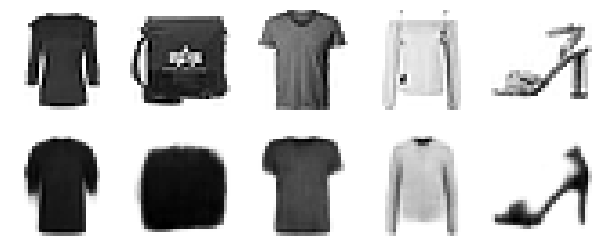

In [ ]:
show_reconstructions(variational_autoencoder)

Saving figure vae_generated_images_plot


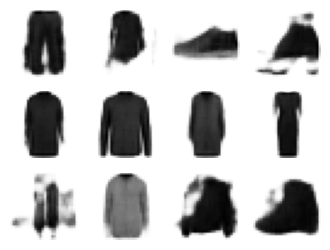

In [ ]:
tf.random.set_seed(0)

codings = tf.random.normal(shape=[12, encoding_dimension])
images = decoder_model(codings).numpy()
plot_multiple_images(images, 4)
save_fig("vae_generated_images_plot", tight_layout=False)

Saving figure semantic_interpolation_plot


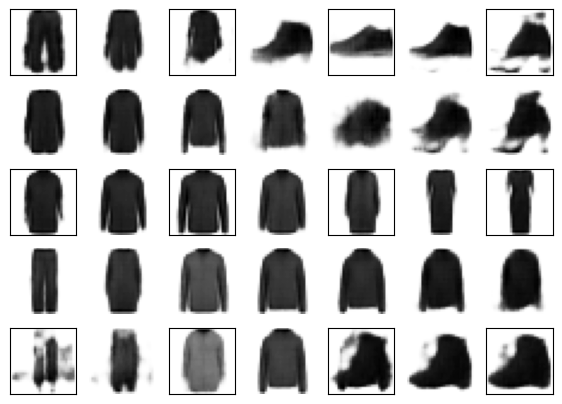

In [ ]:
tf.random.set_seed(10)
np.random.seed(0)
codings_grid = tf.reshape(codings, [1, 3, 4, encoding_dimension])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, encoding_dimension])
images = decoder_model(interpolated_codings).numpy()
plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index + 1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")
save_fig("semantic_interpolation_plot", tight_layout=False)

In [ ]:
print(y_test.shape)  # Debería ser algo como (n_samples,)


(10000,)


In [ ]:
results = variational_autoencoder.evaluate(X_test, {"reconstruction": X_test, "dkl_loss": np.zeros((X_test.shape[0],)), "classifier": y_test})


313/313 [==============================] - 2s 6ms/step - loss: 1.0293 - modelo_encoder_loss: 0.4939 - dkl_perdida_loss: 0.1725 - modelo_reconstructor_loss: 0.3630 - modelo_encoder_accuracy: 0.9104


In [ ]:
predictions = variational_autoencoder.predict(X_test)
print(predictions['classifier'].shape)
print(y_test.shape)


313/313 [==============================] - 2s 5ms/step
(10000, 10)
(10000,)


In [ ]:
print(historial.history.keys())




dict_keys(['loss', 'modelo_encoder_loss', 'dkl_perdida_loss', 'modelo_reconstructor_loss', 'modelo_encoder_accuracy', 'val_loss', 'val_modelo_encoder_loss', 'val_dkl_perdida_loss', 'val_modelo_reconstructor_loss', 'val_modelo_encoder_accuracy', 'lr'])


Evaluación con test: Reconstruction Loss = 0.47964712977409363, DKL Loss = 0.17245662212371826, Classification Accuracy = 0.3642


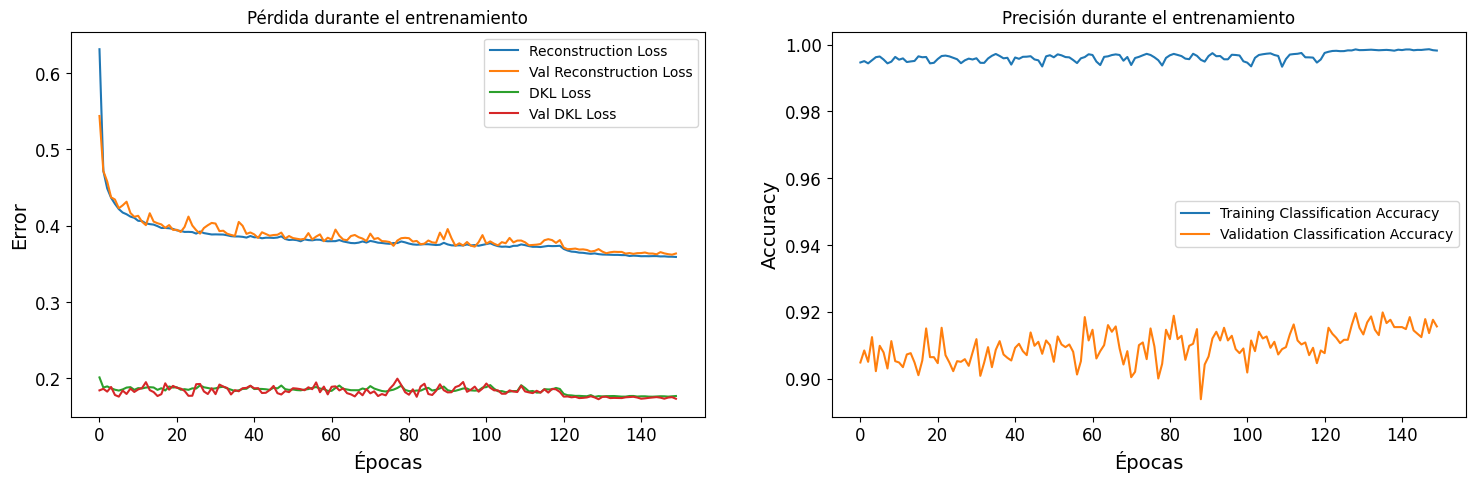

In [ ]:
evaluar_midl(historial, variational_autoencoder, X_test)


313/313 [==============================] - 3s 10ms/step


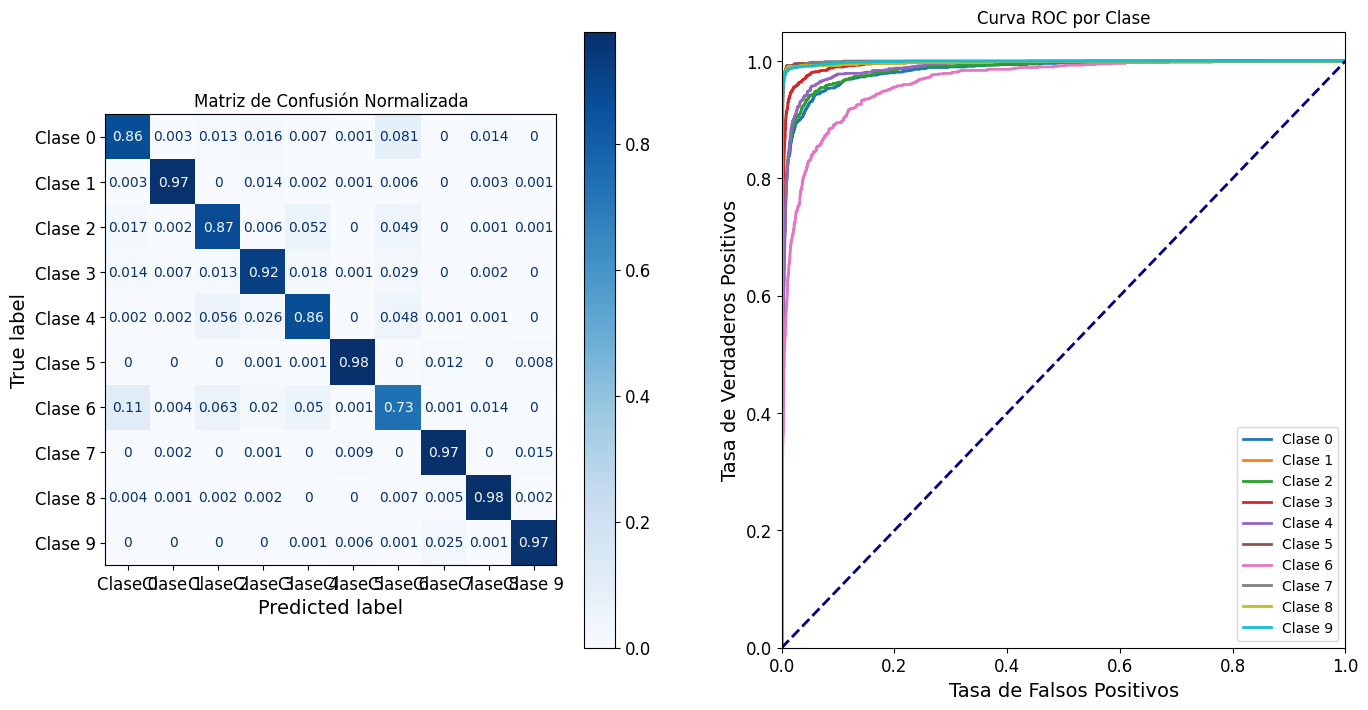

Precisión: 0.9111
Recall: 0.9116
F2-score: 0.9115
              precision    recall  f1-score   support

     Clase 0       0.85      0.86      0.86      1000
     Clase 1       0.98      0.97      0.97      1000
     Clase 2       0.86      0.87      0.86      1000
     Clase 3       0.91      0.92      0.92      1000
     Clase 4       0.87      0.86      0.87      1000
     Clase 5       0.98      0.98      0.98      1000
     Clase 6       0.77      0.73      0.75      1000
     Clase 7       0.96      0.97      0.96      1000
     Clase 8       0.96      0.98      0.97      1000
     Clase 9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
evaluate_classifier_performance(X_test, y_test, variational_autoencoder)

313/313 [==============================] - 1s 4ms/step


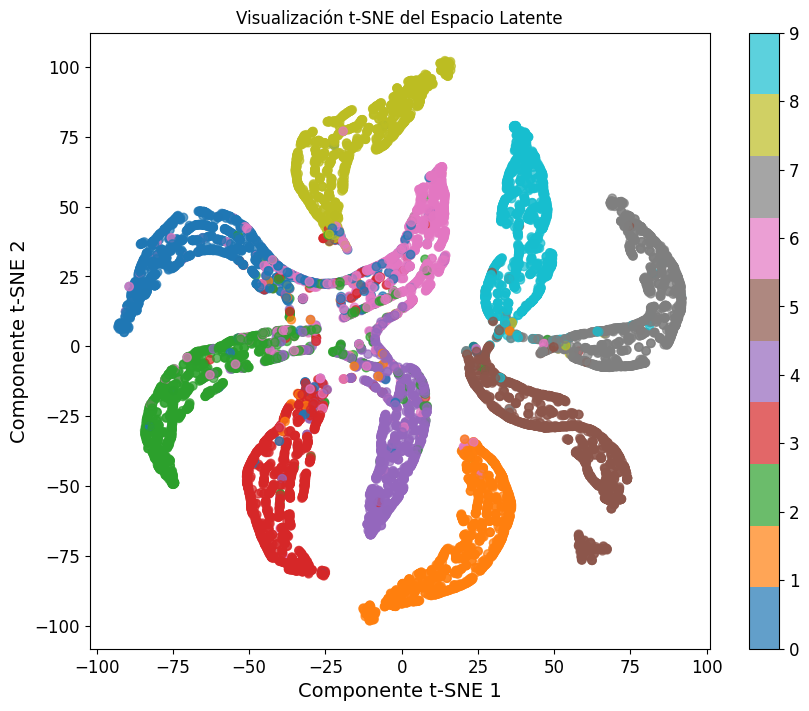

In [ ]:
from sklearn.manifold import TSNE
_, _, _, codificaciones_latentes = encoder_model.predict(X_test)


tsne_model = TSNE(n_components=2, random_state=42)
codificaciones_2d = tsne_model.fit_transform(codificaciones_latentes)

plt.figure(figsize=(10, 8))
scatter_plot = plt.scatter(codificaciones_2d[:, 0], codificaciones_2d[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.colorbar(scatter_plot, ticks=range(10))
plt.title("Visualización t-SNE del Espacio Latente")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()

In [ ]:
from tensorflow.keras.models import Model


In [ ]:
for layer in encoder_model.layers:
    print(layer.name, layer.__class__.__name__)


entrada InputLayer
Convolucion1 Conv2D
max_pooling2d MaxPooling2D
leaky_re_lu LeakyReLU
Convolucion2 Conv2D
max_pooling2d_1 MaxPooling2D
leaky_re_lu_1 LeakyReLU
Convolucion3 Conv2D
max_pooling2d_2 MaxPooling2D
Capa_intermedia LeakyReLU
flatten Flatten
dense Dense
leaky_re_lu_2 LeakyReLU
media_codificacion Dense
log_var_codificacion Dense
muestra_codificacion Sampling
clasificador Dense


Procesando capa: Convolucion1


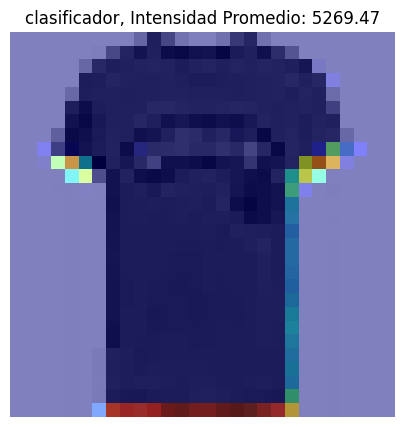

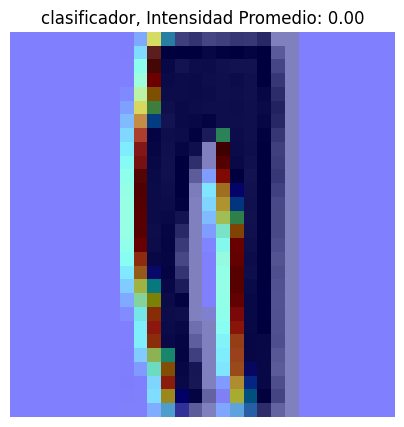

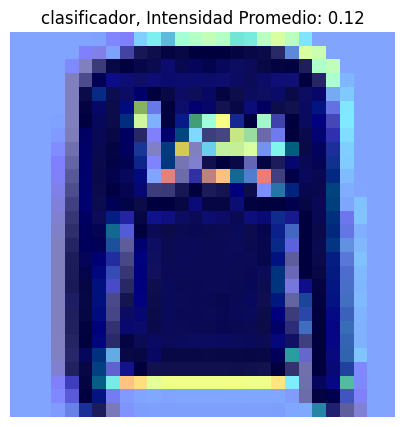

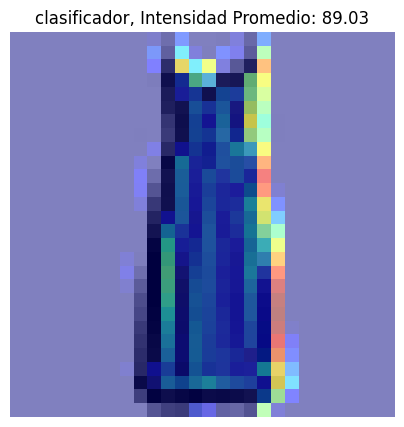

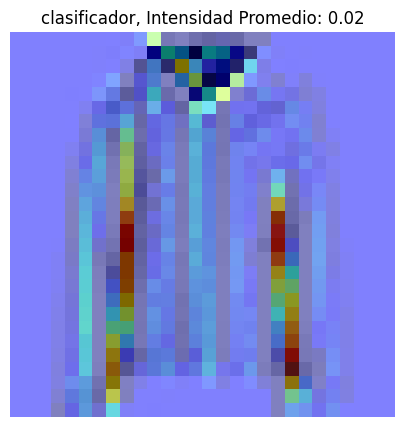

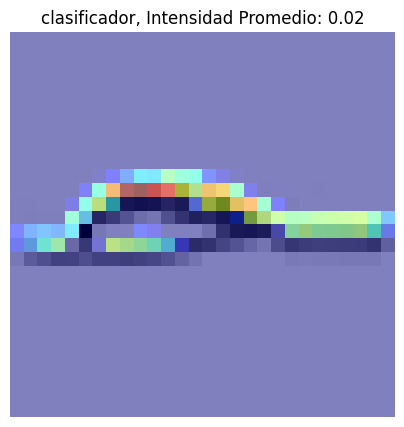

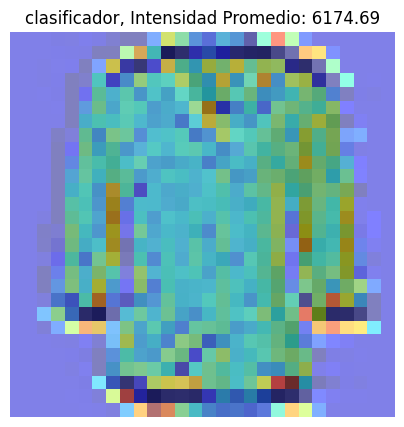

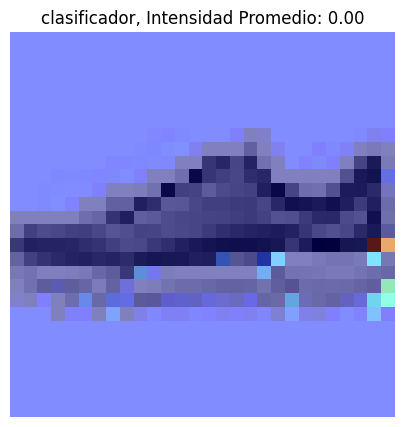

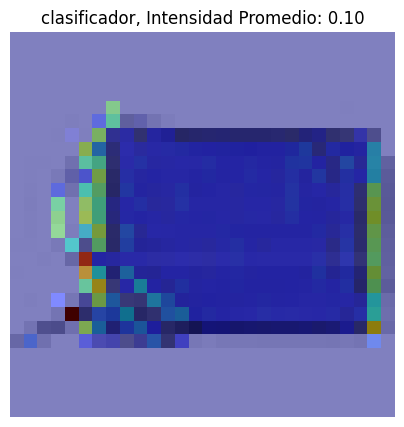

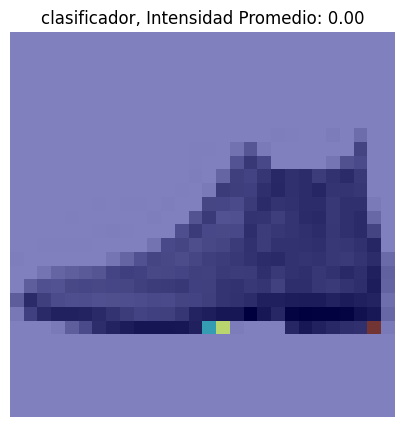

Procesando capa: Convolucion2


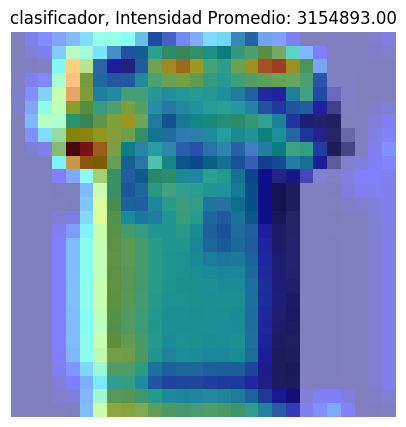

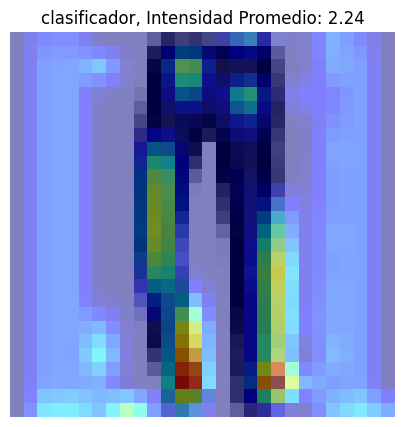

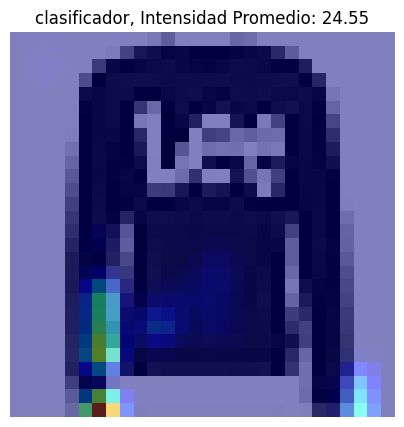

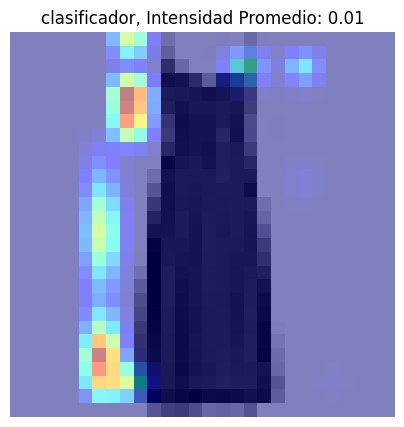

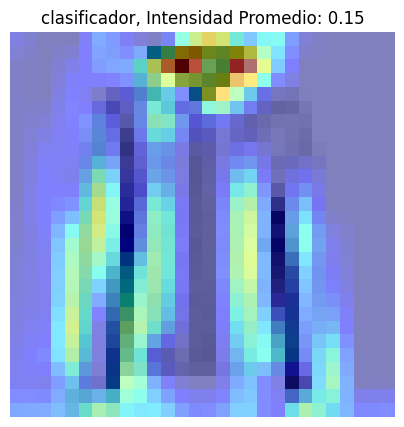

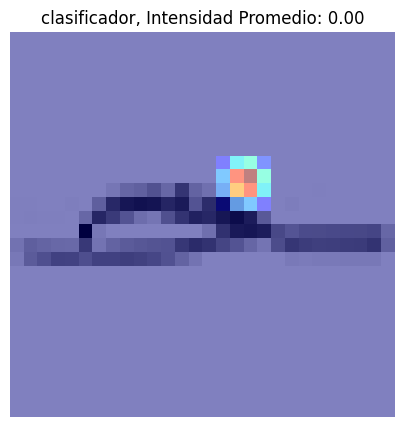

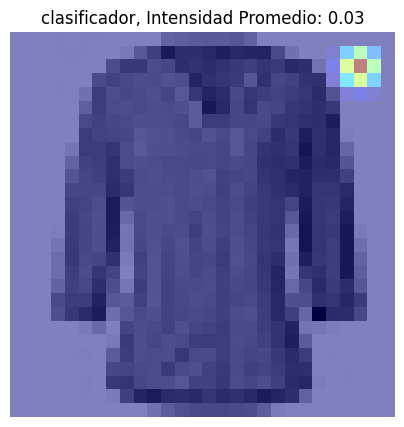

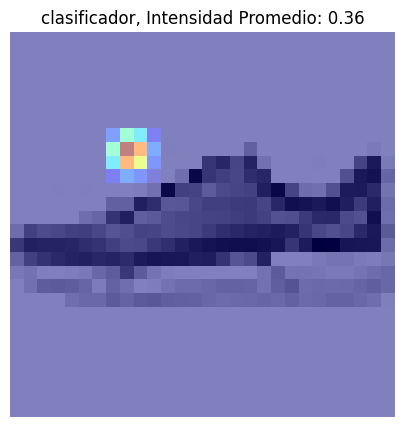

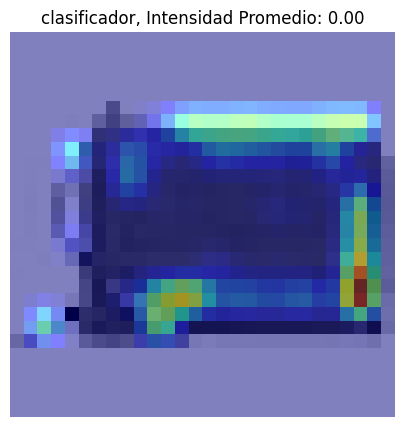

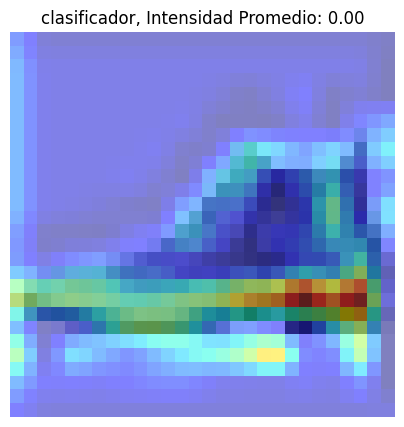

Procesando capa: Convolucion3


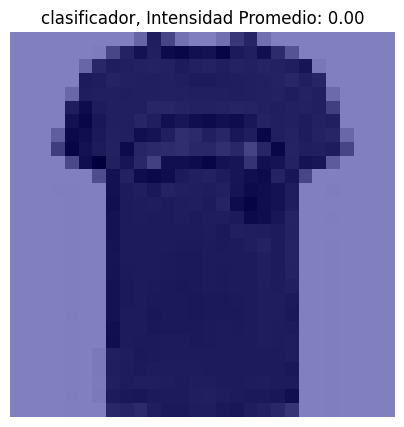

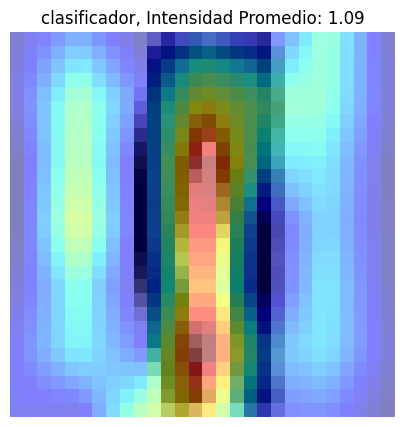

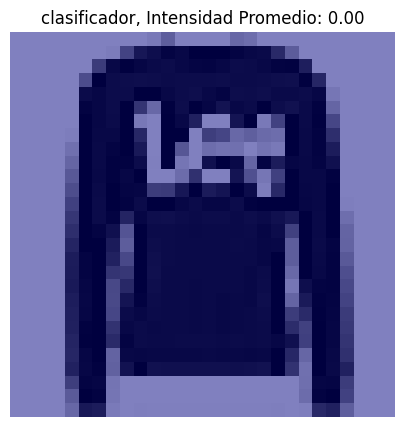

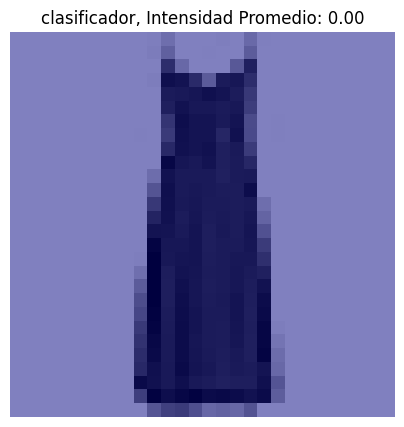

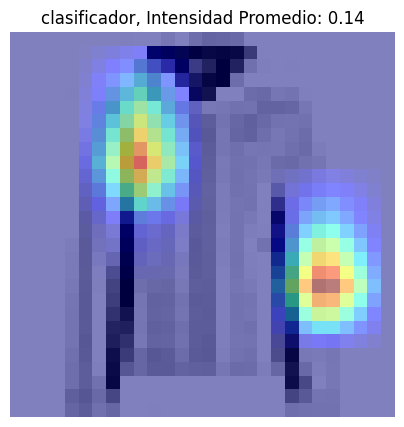

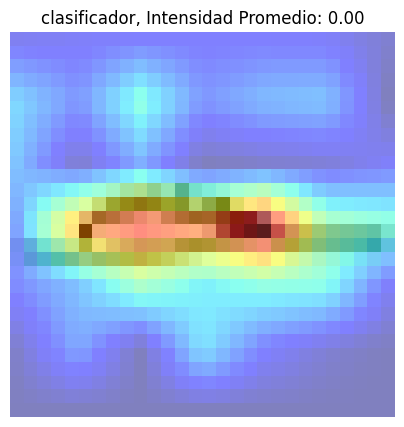

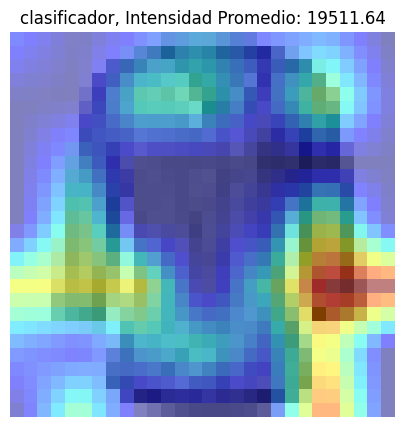

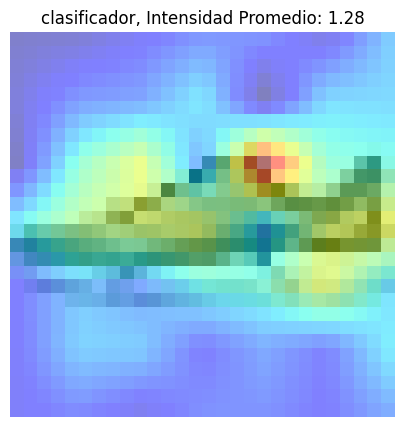

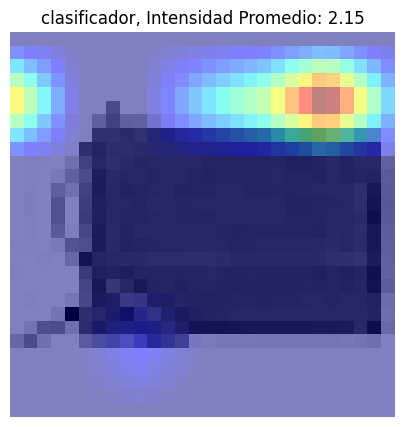

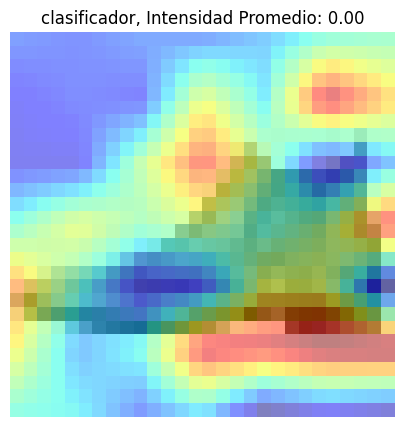

Procesando capa: Capa_intermedia


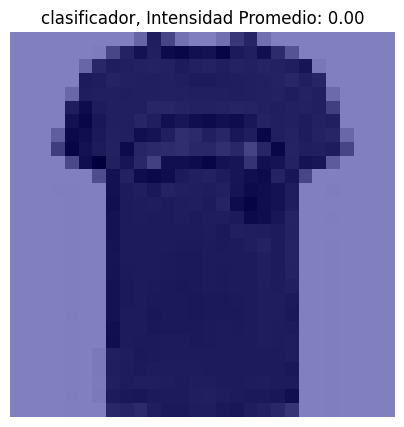

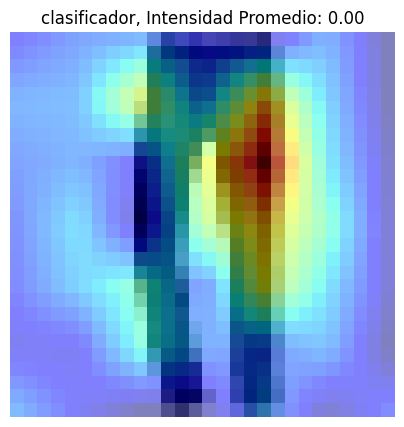

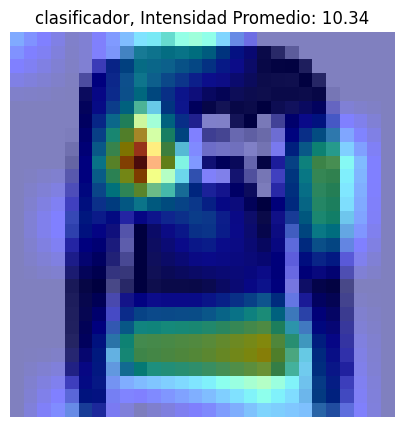

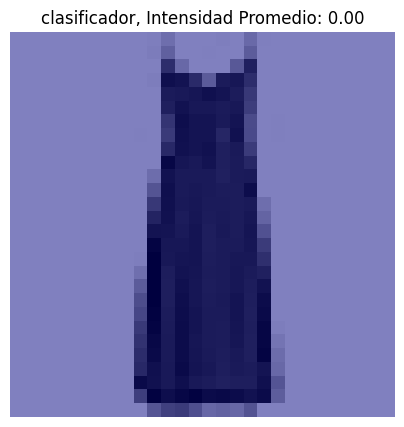

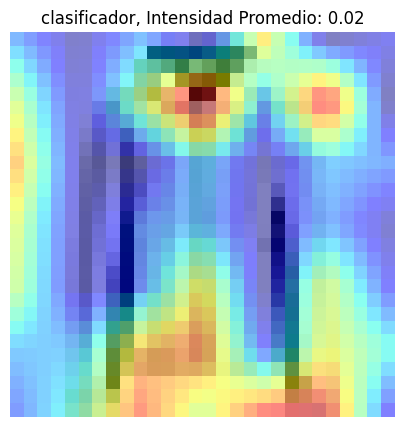

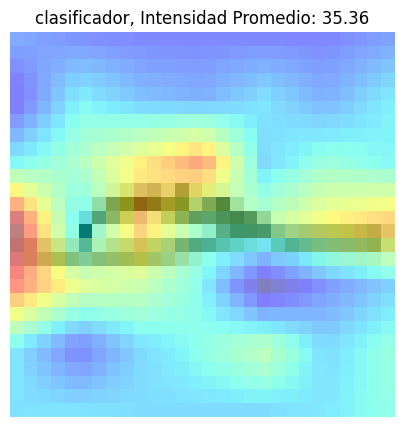

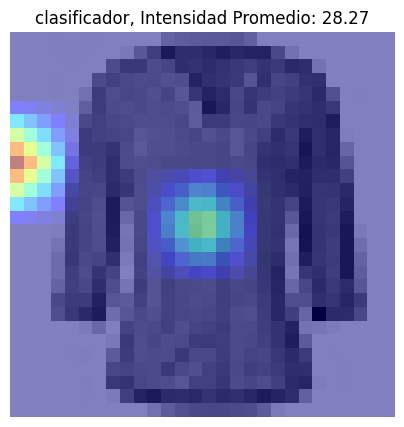

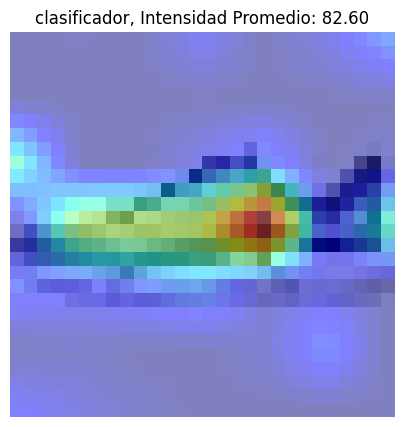

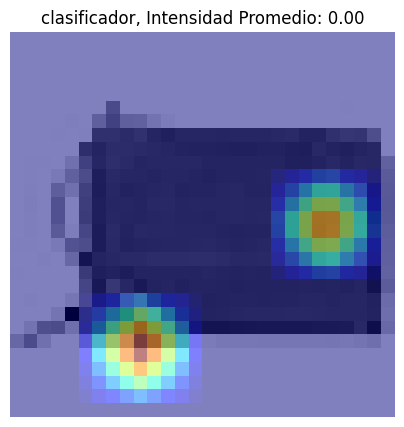

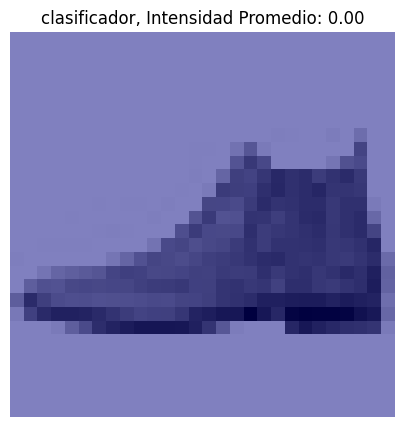

In [ ]:
capas_para_visualizar = ['Convolucion1']
generate_and_visualize_cam(encoder_model, X_test, y_test, capas_para_visualizar, salida_objetivo='clasificador', modo_clasificacion=True)

capas_para_visualizar = ['Convolucion2']
generate_and_visualize_cam(encoder_model, X_test, y_test, capas_para_visualizar, salida_objetivo='clasificador', modo_clasificacion=True)

capas_para_visualizar = ['Convolucion3']
generate_and_visualize_cam(encoder_model, X_test, y_test, capas_para_visualizar, salida_objetivo='clasificador', modo_clasificacion=True)

capas_para_visualizar = ['Capa_intermedia']
generate_and_visualize_cam(encoder_model, X_test, y_test, capas_para_visualizar, salida_objetivo='clasificador', modo_clasificacion=True)



#conclusiones

El modelo de autoencoder variacional que se ha desarrollado muestra un rendimiento prometedor en la tarea de clasificación de imágenes, así como en la representación de datos en un espacio latente bien estructurado. La visualización t-SNE del espacio latente indica que el modelo ha aprendido a separar de manera efectiva las diferentes clases, lo que es un indicador positivo de la capacidad del encoder para capturar características significativas que son esenciales para la tarea de clasificación. Este comportamiento sugiere que el modelo tiene una buena capacidad de abstracción, logrando una representación comprimida que facilita la diferenciación entre las categorías del conjunto de datos.

Sin embargo, a pesar de los buenos resultados generales, se observan algunas áreas de mejora, particularmente en la precisión del modelo cuando se evalúa en el conjunto de datos de validación. La inestabilidad en la precisión durante la validación podría indicar que el modelo está ligeramente sobreajustado a los datos de entrenamiento, lo que afecta su capacidad de generalización. Esta discrepancia entre el rendimiento en los conjuntos de entrenamiento y validación subraya la necesidad de explorar ajustes en la arquitectura del modelo o en las técnicas de regularización, como el uso de dropout o la modificación de la tasa de aprendizaje, para mejorar la robustez del modelo ante datos no vistos.

Por otro lado, las imágenes reconstruidas por el decoder del autoencoder, aunque reconocibles, muestran cierto grado de borrosidad, especialmente en los detalles más finos. Esto podría ser una señal de que el modelo, si bien capta las características globales de las imágenes, podría beneficiarse de un ajuste más fino en las capas del decoder o de un incremento en la capacidad del modelo para mejorar la calidad de las reconstrucciones. La mejora en este aspecto no solo fortalecería la capacidad del modelo para tareas de generación de imágenes, sino que también podría contribuir a una representación más precisa en el espacio latente.

#conclusiones

El modelo de autoencoder variacional que se ha desarrollado muestra un rendimiento prometedor en la tarea de clasificación de imágenes, así como en la representación de datos en un espacio latente bien estructurado. La visualización t-SNE del espacio latente indica que el modelo ha aprendido a separar de manera efectiva las diferentes clases, lo que es un indicador positivo de la capacidad del encoder para capturar características significativas que son esenciales para la tarea de clasificación. Este comportamiento sugiere que el modelo tiene una buena capacidad de abstracción, logrando una representación comprimida que facilita la diferenciación entre las categorías del conjunto de datos.

Sin embargo, a pesar de los buenos resultados generales, se observan algunas áreas de mejora, particularmente en la precisión del modelo cuando se evalúa en el conjunto de datos de validación. La inestabilidad en la precisión durante la validación podría indicar que el modelo está ligeramente sobreajustado a los datos de entrenamiento, lo que afecta su capacidad de generalización. Esta discrepancia entre el rendimiento en los conjuntos de entrenamiento y validación subraya la necesidad de explorar ajustes en la arquitectura del modelo o en las técnicas de regularización, como el uso de dropout o la modificación de la tasa de aprendizaje, para mejorar la robustez del modelo ante datos no vistos.

Por otro lado, las imágenes reconstruidas por el decoder del autoencoder, aunque reconocibles, muestran cierto grado de borrosidad, especialmente en los detalles más finos. Esto podría ser una señal de que el modelo, si bien capta las características globales de las imágenes, podría beneficiarse de un ajuste más fino en las capas del decoder o de un incremento en la capacidad del modelo para mejorar la calidad de las reconstrucciones. La mejora en este aspecto no solo fortalecería la capacidad del modelo para tareas de generación de imágenes, sino que también podría contribuir a una representación más precisa en el espacio latente.